In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
NUM_TRIAL=10000
EPS=0.1
BANDIT_PROBS=[0.2,0.4,0.6]

In [3]:
class Bandit:
    def __init__(self,p):
        self.p = p
        self.p_estimate=0
        self.k=0
    def pull(self):
        return np.random.random()<self.p
    def update(self,R):
        self.k += 1
        self.p_estimate = self.p_estimate + (1/self.k)*(R-self.p_estimate)


In [4]:
bandits = [Bandit(p) for p in BANDIT_PROBS]

In [5]:
bandits[2].p_estimate

0

In [6]:
def greedy_epsilon(EPS):
    rewards=np.zeros(NUM_TRIAL)
    num_times_explored = 0
    num_times_exploities=0
    num_optimal=0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:",optimal_j)
    for i in range(NUM_TRIAL):
        if np.random.random()<EPS:
            j = np.random.randint(len(bandits))
            num_times_explored+=1
        else:
            num_times_exploities+=1
            j = np.argmax([b.p_estimate for b in bandits])
        if j==optimal_j:
            num_optimal+=1
            
            
        R = bandits[j].pull()
        rewards[i] = R
        bandits[j].update(R)
    for b in bandits:
        print("mean estimate:",b.p_estimate)
    
    
    print("total reward earbed: ",rewards.sum())
    print("overall win rate:", rewards.sum()/NUM_TRIAL)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploities:", num_times_exploities)
    print("num_selected_optimal_bandit:", num_optimal)
    
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIAL)+1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIAL)*np.max(BANDIT_PROBS))    
    plt.xscale("log")
    plt.show()

In [7]:
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:",optimal_j)

optimal j: 2


optimal j: 2
mean estimate: 0.18023255813953498
mean estimate: 0.4013157894736843
mean estimate: 0.6004063301967503
total reward earbed:  5799.0
overall win rate: 0.5799
num_times_explored: 956
num_times_exploities: 9044
num_selected_optimal_bandit: 9352


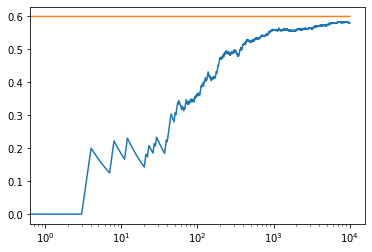

In [8]:
greedy_epsilon(0.1)

In [9]:
np.random.randint(len(bandits))

2

In [10]:
np.random.randint(len(bandits))

1

In [11]:
np.random.randint(len(bandits))

2

In [12]:
np.arange(NUM_TRIAL)+1

array([    1,     2,     3, ...,  9998,  9999, 10000])